In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import moment
from tqdm import tqdm
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist, squareform
import a_ssa as SSA

In [2]:
def toy_example_1():
    N = 200 # The number of time 'moments' in our toy series
    t = np.arange(0,N)
    trend = 0.001 * (t - 100)**2
    p1, p2 = 20, 30
    periodic1 = 2 * np.sin(2*np.pi*t/p1)
    periodic2 = 0.75 * np.sin(2*np.pi*t/p2)

    np.random.seed(123) # So we generate the same noisy time series every time.
    noise = 2 * (np.random.rand(N) - 0.5)
    F = trend + periodic1 + periodic2 + noise

    # Plot everything
    plt.plot(t, F, lw=2.5)
    plt.plot(t, trend, alpha=0.75)
    plt.plot(t, periodic1, alpha=0.75)
    plt.plot(t, periodic2, alpha=0.75)
    plt.plot(t, noise, alpha=0.5)
    plt.legend(["Toy Series ($F$)", "Trend", "Periodic #1", "Periodic #2", "Noise"])
    plt.xlabel("$t$")
    plt.ylabel("$F(t)$")
    plt.title("The Toy Time Series and its Components")

    return F


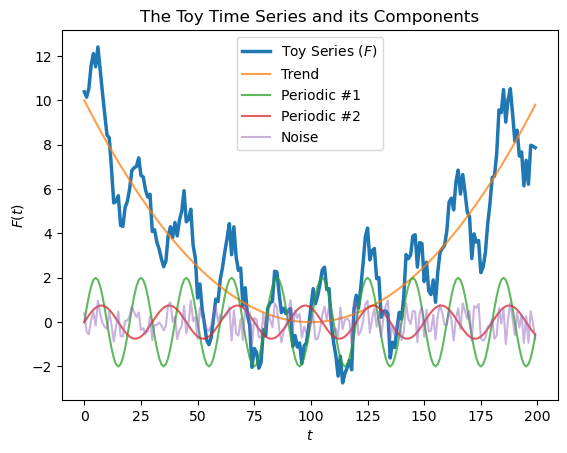

In [3]:
toy_1 = toy_example_1()

In [4]:
S_test = SSA.A_SSA(toy_1)

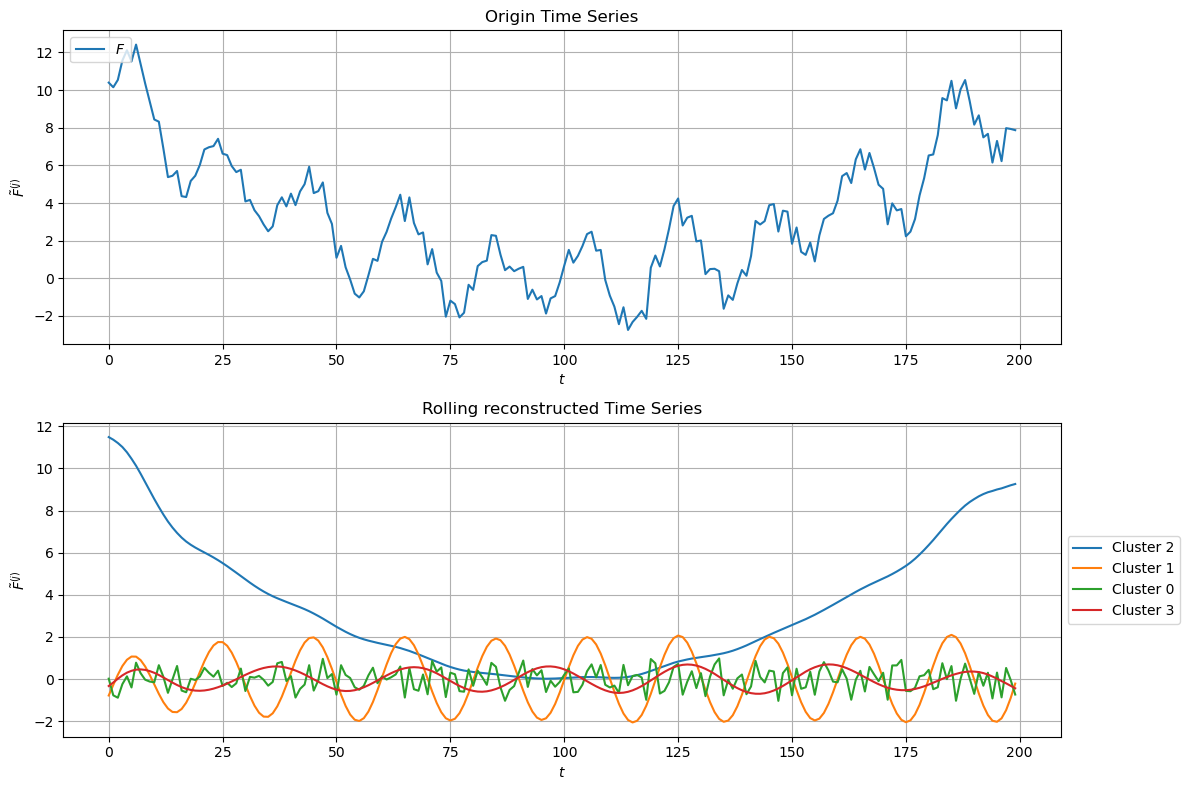

In [5]:
S_test.fit_transform(50)
S_test_result = S_test.time_reconstruction(4)
S_test.plot_reconstructed_TS(S_test_result)